# L'objectif est créer un modèle pour  prédire le prix d'une maison

In [7]:
#1.	Explorez cet ensemble de données en utilisant ce que vous avez appris dans le prétraitement des données et la visualisation des données

import pandas as pd
df=pd.read_csv('kc_house_data.csv')
print(df.head())



           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [5]:
#vérifier les valeurs manquantes
print(df.isnull().sum()) # il y'a pas de valeurs manquantes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [19]:
#2.	Rédigez un paragraphe en sélectionnant les fonctionnalités les plus importantes (sélection des fonctionnalités). 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['date']=encoder.fit_transform(df['date'])

In [31]:
#3.	Divisez votre ensemble de données en un ensemble d'apprentissage et un ensemble de test. 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
Y=df['price']
X=df.drop('price',axis=1)


In [32]:
#4.	Appliquez la régression linéaire à votre ensemble d'entraînement
model.fit(X,Y)
model.score(X,Y) # 70% DE PROBABILITE POUR QUE LE MODELE EFFECTUE UNE BONNE PREDICTION

0.7011053273049416

In [35]:
model.predict(X)

array([202784.19850007, 737926.2127511 , 391687.80023276, ...,
       131950.07920999, 400340.56096337, 148225.79558655])

0.4928532179037931


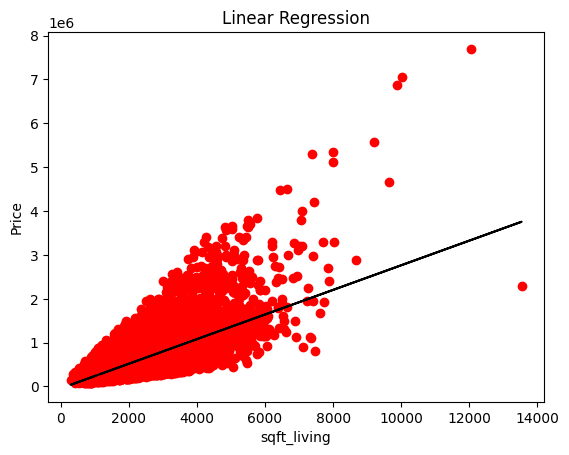

In [51]:
x = df.drop(['price','id','date','bedrooms','bathrooms','grade','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1)
model=LinearRegression()
model=model.fit(x,Y)
print(model.score(x,Y))
plt.scatter(x,Y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [ ]:
x = df.drop(['price',''],axis=1)
plt.scatter(x,Y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("grade")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [55]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005367,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005367,1.000000,-0.004649,-0.016964,-0.034481,-0.034570,0.006361,-0.022395,0.001544,-0.001837,...,-0.040040,-0.027890,-0.019554,-0.000471,-0.024401,0.001376,-0.032851,-0.007205,-0.031653,0.002643
price,-0.016762,-0.004649,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016964,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.034481,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.034570,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006361,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022395,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001544,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001837,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


In [ ]:
#Appliquons la régression multilinéaire 